In [17]:
import pandas as pd #veri işleme ve analiz için
import numpy as np #bilimsel hesaplamalar için
from sklearn.model_selection import train_test_split # veriyi eğitim ve test kümesine ayırmak için 
from sklearn.preprocessing import LabelEncoder #katagorik verileri sayısala dönüştürmek için 
from sklearn.linear_model import LinearRegression #kullanacağım model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score #regresyon modeli performansını ölçmek için
import matplotlib.pyplot as plt #veriyi görselleştirmek için

In [18]:
data =pd.read_csv('higher_ed_employee_salaries.csv') # okuması gereken veriyi belirttim
data.head() # görüntülemek için

,Name,School,Job Description,Department,Earnings,Year
0,Don Potter,University of Akron,Assistant Lecturer,Social Work,2472.00,2019
1,Emily Potter,The Ohio State University,Administrative Assistant 3,Arts and Sciences | Chemistry and Biochemistry...,48538.02,2022
2,Carol Jean Potter,The Ohio State University,Associate Professor-Clinical,Pediatrics,22722.80,2013
3,Kim Potter,The Ohio State University,"Manager 4, Compliance",Legal Affairs | Compliance,170143.44,2022
4,Graham Potter,Miami University,Building and Grounds Assistant,"Assoc VP Housing,Dining,Rec,Bus Svc",3075.20,2012


In [19]:
df = pd.DataFrame(data) #data kelimesini df olarak yazacağımı belirttim

In [20]:
label_encoders = {}  #katagorik olan verileri sayısala dönüştürüp o sütunları gösterip tansfer ettim 
for column in ['Name', 'School', 'Job Description', 'Department']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [21]:
X = df.drop('Earnings', axis=1) # burda maas sutunu dısında bütün sutunları almasını söyledim 
y = df['Earnings']  #maas verisini y de hedef diye atadım

In [22]:
if y.isna().sum() > 0:
    print(f"NaN değerler bulunuyor: {y.isna().sum()}")
    # NaN değerleri kaldırabiliriz ya da doldurabiliriz, burada kaldırıyoruz
    df = df.dropna(subset=['Earnings'])
    X = df.drop('Earnings', axis=1)
    y = df['Earnings']


NaN değerler bulunuyor: 9675


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=32
 #test ve eğitim kümesini ayırdım veri kümesinin %40 ını test kümesi olarak aldım 
#baslangıc noktası olarak 32 yi atadım 

In [24]:
lr_model = LinearRegression()  #lineer regresyon 
lr_model.fit(X_train, y_train) #modeli egittim

LinearRegression()

In [25]:
y_pred = lr_model.predict(X_test)# predict fonksiyonu ile tahminleri buldurdum ve tahminler y predde birlestirdim

In [26]:
mse = mean_squared_error(y_test, y_pred)  #tahmin ve gerçek değerin karesinin ortalamasını aldırdım 
mae = mean_absolute_error(y_test, y_pred)  #tahmin ve gerçek arasındaki mutlak fark 
rmse = np.sqrt(mse)  #mse nin kareköküdür
r2 = r2_score(y_test, y_pred)  # bağımsızın bağımlı üzerindeki acıklanabilirlik oranını verir 
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # mutlak yüzde hata ortanını verir 

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')
#bulunan degerleri yazdırdım

Mean Squared Error (MSE): 3664338809.487405
Mean Absolute Error (MAE): 35220.94273187193
Root Mean Squared Error (RMSE): 60533.78238213275
R-squared (R²): 0.01618523500301383
Mean Absolute Percentage Error (MAPE): 7678.124080459824%


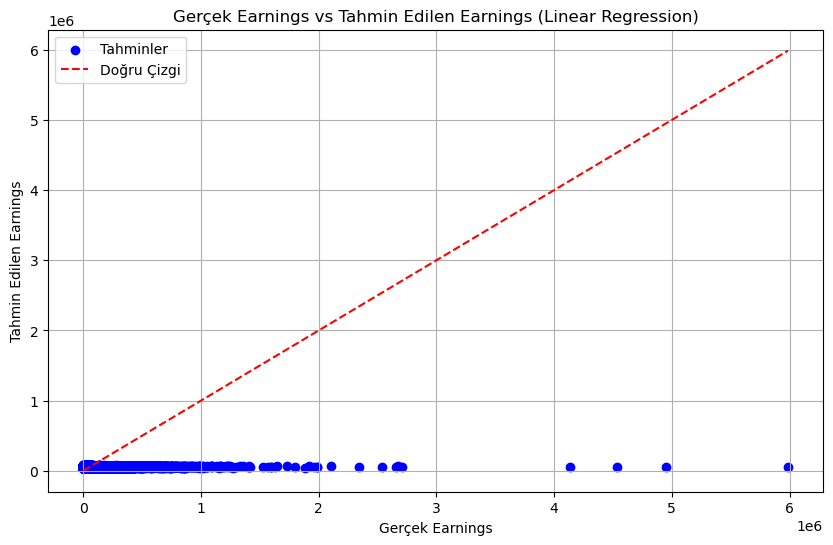

In [28]:
plt.figure(figsize=(10, 6)) #grafik genişligini belirttim
plt.scatter(y_test, y_pred_lr, color='blue', label='Tahminler')#grafik edtayları
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Doğru Çizgi')
plt.xlabel('Gerçek Earnings') #gercek kazncı cizdirdim
plt.ylabel('Tahmin Edilen Earnings') #tahmin edilen kazancı cizdirdim
plt.title('Gerçek Earnings vs Tahmin Edilen Earnings (Linear Regression)') #grafigin baslıgı
plt.legend()
plt.grid(True) # grafiğe kare ızgaralar eklettim 
plt.show() # grafiği ekrana bastırdım 